40 tipos de insectos

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import math, re, os
import matplotlib.pyplot as plt
import warnings
import glob
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from collections import defaultdict


2023-07-13 05:49:52.627167: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-13 05:49:52.628855: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 05:49:52.666914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-13 05:49:52.667655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 05:49:53.381234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:

def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

set_seed()

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

warnings.filterwarnings('ignore')

In [3]:
species_folders = {
    'Dolycoris baccarum (Linnaeus)': 'carpetas/Dolycoris baccarum (Linnaeus)',
    'Lycorma delicatula (White)': 'carpetas/Lycorma delicatula (White)',
    'Eurydema dominulus (Scopoli)': 'carpetas/Eurydema dominulus (Scopoli)',
    'Pieris rapae (Linnaeus)':'carpetas/Pieris rapae (Linnaeus)',
    'Halyomorpha halys (Stål)':'carpetas/Halyomorpha halys (Stål)',
    'Spilosoma obliqua (Walker)':'carpetas/Spilosoma obliqua (Walker)',
    'Graphosoma rubrolineata (Westwood)':'carpetas/Graphosoma rubrolineata (Westwood)',
    'Luperomorpha suturalis (Chen)':'carpetas/Luperomorpha suturalis Chen',
    'Leptocorisa acuta (Thunberg)':'carpetas/Leptocorisa acuta (Thunberg)',
    'Sesamia inferens (Walker)':'carpetas/Sesamia inferens (Walker)',
    'Cicadella viridis (Linnaeus)':'carpetas/Cicadella viridis (Linnaeus)',
    'Callitettix versicolor (Fabricius)':'carpetas/Callitettix versicolor (Fabricius)',
    'Scotinophara lurida (Burmeister)':'carpetas/Scotinophara lurida (Burmeister)',
    'Cletus punctiger (Dallas)':'carpetas/Cletus punctiger (Dallas)',
    'Nezara viridula (Linnaeus)':'carpetas/Nezara viridula (Linnaeus)',
    'Dicladispa armigera (Olivier)':'carpetas/Dicladispa armigera (Olivier)',
    'Riptortus pedestris (Fabricius)':'carpetas/Riptortus pedestris (Fabricius)',
    'Maruca testulalis (Gryer)':'carpetas/Maruca testulalis Gryer',
    'Chauliops fallax (Scott)':'carpetas/Chauliops fallax Scott',
    'Chilo supperssalis (Walker)':'carpetas/Chilo supperssalis (Walker)',
    'Stollia ventralis (Westwood)':'carpetas/Stollia ventralis (Westwood)',
    'Nilaparvata lugens (Stål)':'carpetas/Nilaparvata lugens (Stål)',
    'Diostrombus politus (Uhler)':'carpetas/Diostrombus politus Uhler',
    'Phyllotreta striolata (Fabricius)':'carpetas/Phyllotreta striolata (Fabricius)',
    'Aulacophora indica (Gmelin)':'carpetas/Aulacophora indica (Gmelin)',
    'Laodelphax striatellus (Fallén)':'carpetas/Laodelphax striatellus (Fallén)',
    'Ceroplastes ceriferus (Anderson)':'carpetas/Ceroplastes ceriferus (Anderson)',
    'Corythucha marmorata(Uhler)':'carpetas/Corythucha marmorata(Uhler)',
    'Dryocosmus Kuriphilus (Yasumatsu)':'carpetas/Dryocosmus KuriphilusYasumatsu',
    'Porthesia taiwana (Shiraki)':'carpetas/Porthesia taiwana Shiraki',
    'Chromatomyia horticola(Goureau)':'carpetas/Chromatomyia horticola(Goureau)',
    'Iscadia inexacta (Walker, 1858)':'carpetas/Iscadia inexacta (Walker, 1858)',
    'Plutella xylostella (Linnaeus)':'carpetas/Plutella xylostella (Linnaeus)',
    'Empoasca flavescens (Fabricius)':'carpetas/Empoasca flavescens (Fabricius)',
    'Dolerus tritici (Chu)':'carpetas/Dolerus tritici Chu',
    'Spodoptera litura (Fabricius)':'carpetas/Spodoptera litura (Fabricius)',
    'Corythucha ciliata (Say)':'carpetas/Corythucha ciliata (Say)',
    'Bemisia tabaci (Gennadius)':'carpetas/Bemisia tabaci (Gennadius)',
    'Ceutorhynchus asper (Roelofs)':'carpetas/Ceutorhynchus asper Roelofs',
    'Strongyllodes variegatus (Fairmaire)':'carpetas/Strongyllodes variegatus (Fairmaire)',
}
CLASSES = list(species_folders.keys())

df_labels = {
    'Dolycoris baccarum (Linnaeus)': 0,
    'Lycorma delicatula (White)': 1,
    'Eurydema dominulus (Scopoli)': 2,
    'Pieris rapae (Linnaeus)':3,
    'Halyomorpha halys (Stål)':4,
    'Spilosoma obliqua (Walker)':5,
    'Graphosoma rubrolineata (Westwood)':6,
    'Luperomorpha suturalis (Chen)':7,
    'Leptocorisa acuta (Thunberg)':8,
    'Sesamia inferens (Walker)':9,
    'Cicadella viridis (Linnaeus)':10,
    'Callitettix versicolor (Fabricius)':11,
    'Scotinophara lurida (Burmeister)':12,
    'Cletus punctiger (Dallas)':13,
    'Nezara viridula (Linnaeus)':14,
    'Dicladispa armigera (Olivier)':15,
    'Riptortus pedestris (Fabricius)':16,
    'Maruca testulalis (Gryer)':17,
    'Chauliops fallax (Scott)':18,
    'Chilo supperssalis (Walker)':19,
    'Stollia ventralis (Westwood)':20,
    'Nilaparvata lugens (Stål)':21,
    'Diostrombus politus (Uhler)':22,
    'Phyllotreta striolata (Fabricius)':23,
    'Aulacophora indica (Gmelin)':24,
    'Laodelphax striatellus (Fallén)':25,
    'Ceroplastes ceriferus (Anderson)':26,
    'Corythucha marmorata(Uhler)':27,
    'Dryocosmus Kuriphilus (Yasumatsu)':28,
    'Porthesia taiwana (Shiraki)':29,
    'Chromatomyia horticola(Goureau)':30,
    'Iscadia inexacta (Walker, 1858)':31,
    'Plutella xylostella (Linnaeus)':32,
    'Empoasca flavescens (Fabricius)':33,
    'Dolerus tritici (Chu)':34,
    'Spodoptera litura (Fabricius)':35,
    'Corythucha ciliata (Say)':36,
    'Bemisia tabaci (Gennadius)':37,
    'Ceutorhynchus asper (Roelofs)':38,
    'Strongyllodes variegatus (Fairmaire)':39,
}

In [4]:

dataset = []
image_paths = []
labels = []


In [5]:
for species_name, folder_path in species_folders.items():
    # Obtener las rutas de archivo de las imágenes en la carpeta
    species_images = glob.glob(folder_path + '/*.jpg')  # Ajusta la extensión según tus imágenes
    
    # Agregar las rutas de archivo y las etiquetas correspondientes a las listas
    image_paths.extend(species_images)
    labels.extend([species_name] * len(species_images))
    
    # Agregar las imágenes y las etiquetas a la lista de datasets
    dataset.extend(list(zip(species_images, [species_name] * len(species_images))))

In [6]:
for image_path, label in dataset:
    print(image_path, label)

carpetas/Dolycoris baccarum (Linnaeus)/003_4010.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4013.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2700.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4018.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2701.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2697.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/AAA_1782_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_7258_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/003_4009.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2690.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/AAA_1781_IJFR.jpg Dolycoris baccarum (Linnaeus)
carpetas/Dolycoris baccarum (Linnaeus)/DSC_2695.jpg Dolycoris baccarum (Linnaeus)
c

In [7]:
def load_and_preprocess_image(image_path, label):
    # Leer la imagen desde el archivo
    image = tf.io.read_file(image_path)
    # Decodificar la imagen en un tensor
    image = tf.image.decode_jpeg(image, channels=3)
    # Redimensionar la imagen a un tamaño fijo
    image = tf.image.resize(image, (224, 224))
    # Normalizar los valores de píxeles en el rango [0, 1]
    image = image / 255.0
    
    return image, label

In [8]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


In [9]:
BATCH_SIZE = 128
IMG_SIZE = (224, 224)

# Create the combined dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(
    'carpetas',
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

# Extract class names from the dataset directory
class_names = dataset.class_names

# Split the dataset into training and validation sets
train_dataset = dataset.take(int(0.8 * len(dataset)))
val_dataset = dataset.skip(int(0.8 * len(dataset)))



Found 4508 files belonging to 40 classes.


2023-07-13 05:49:55.214228: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-07-13 05:49:55.214262: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: gpu-dev2
2023-07-13 05:49:55.214268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: gpu-dev2
2023-07-13 05:49:55.214352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 470.199.2
2023-07-13 05:49:55.214364: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.30.2
2023-07-13 05:49:55.214368: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 530.30.2 does not match DSO version 470.199.2 -- cannot find working devices in this configuration


In [11]:
def batch_to_numpy_images_and_labels(data):
    images, labels = data

    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    if numpy_labels.dtype == object: # binary string in this case,
                                     # these are image ID strings
        numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is
    # the case for test data)
    return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
    if correct_label is None:
        return CLASSES[label], True
    correct = (label == correct_label)
    return "{} [{}{}{}]".format(CLASSES[label], 'OK' if correct else 'NO', u"\u2192" if not correct else '',
                                CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image.astype(int))
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize/1.5) if not red else int(titlesize/2.65), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)

def display_batch_of_images(databatch, predictions=None):
    """This will work with:
    display_batch_of_images(images)
    display_batch_of_images(images, predictions)
    display_batch_of_images((images, labels))
    display_batch_of_images((images, labels), predictions)
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]

    # auto-squaring: this will drop data that does not fit into square
    # or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows

    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        title = '' if label is None else CLASSES[label]
        correct = True
        if predictions is not None:
            title, correct = title_from_label_and_target(predictions[i], label)
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_one_flower(image, title, subplot, not correct, titlesize=dynamic_titlesize)

    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()


In [12]:
ds_iter = iter(train_dataset.unbatch().batch(20))

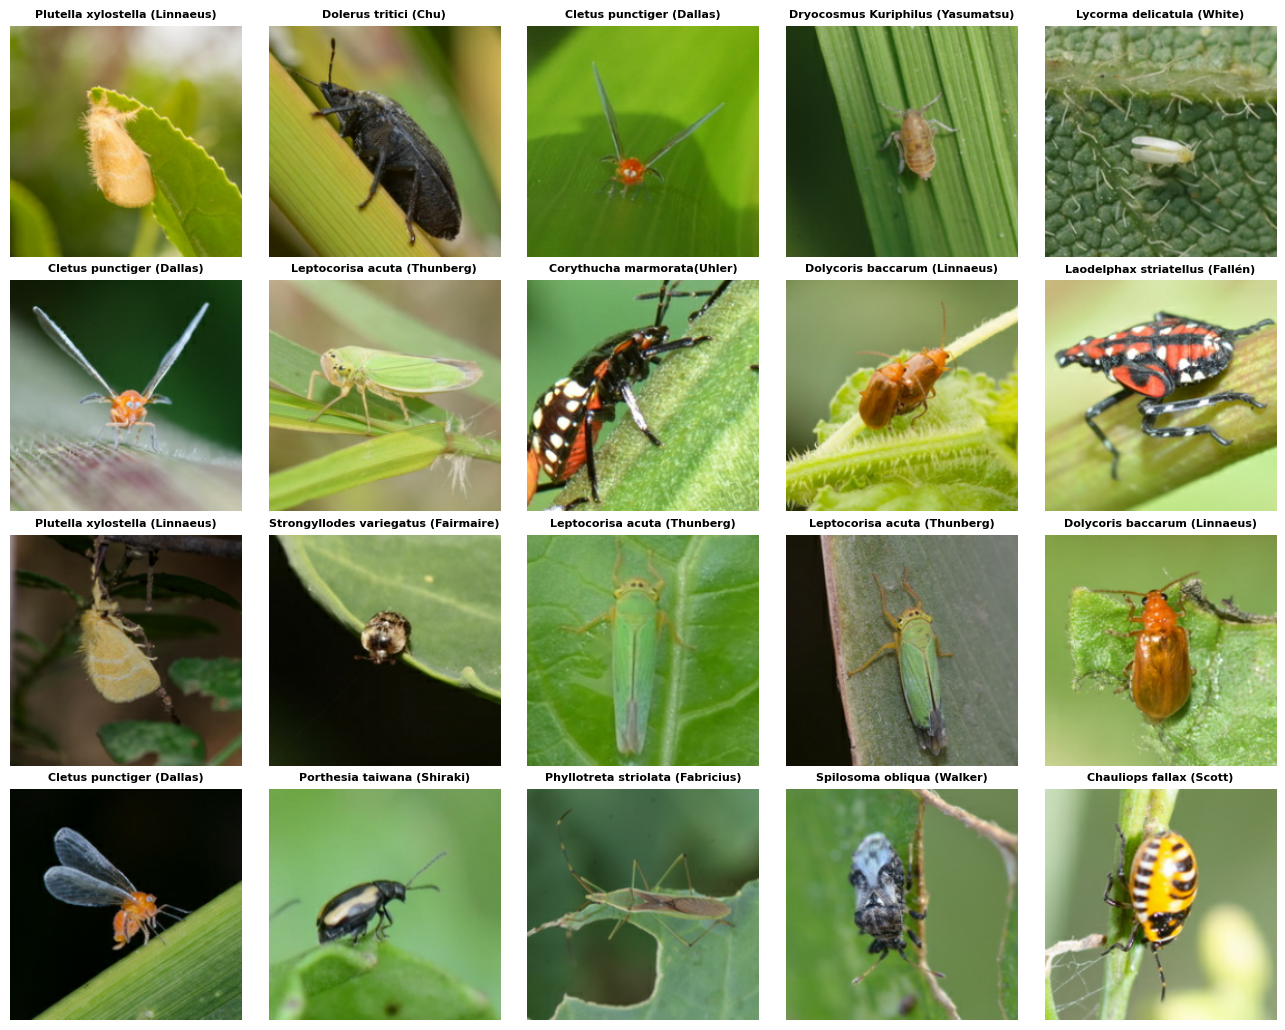

In [13]:
one_batch = next(ds_iter)
display_batch_of_images(one_batch)

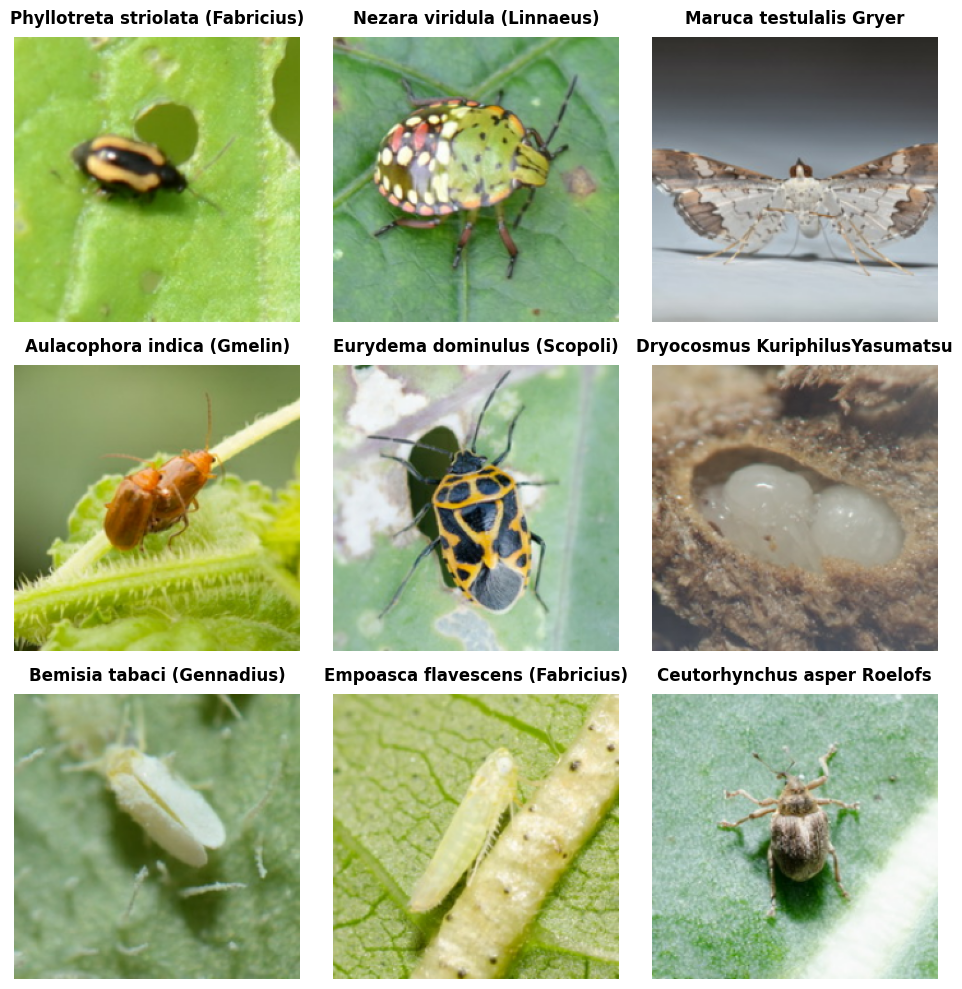

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]], fontsize = 12)
    plt.axis("off")


In [15]:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
validation_dataset = val_dataset.skip(val_batches // 5)


In [16]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 24
Number of test batches: 5


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


Usar aumento de datos

In [18]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])


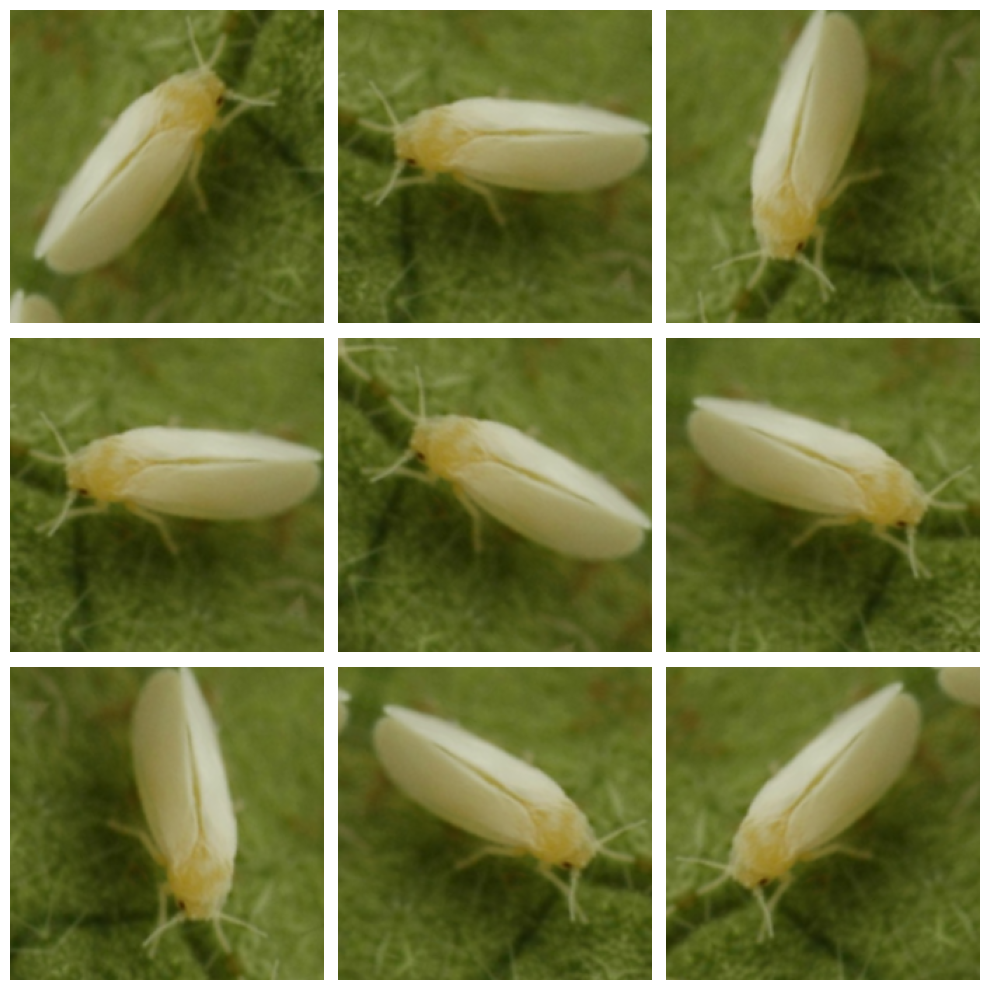

In [19]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


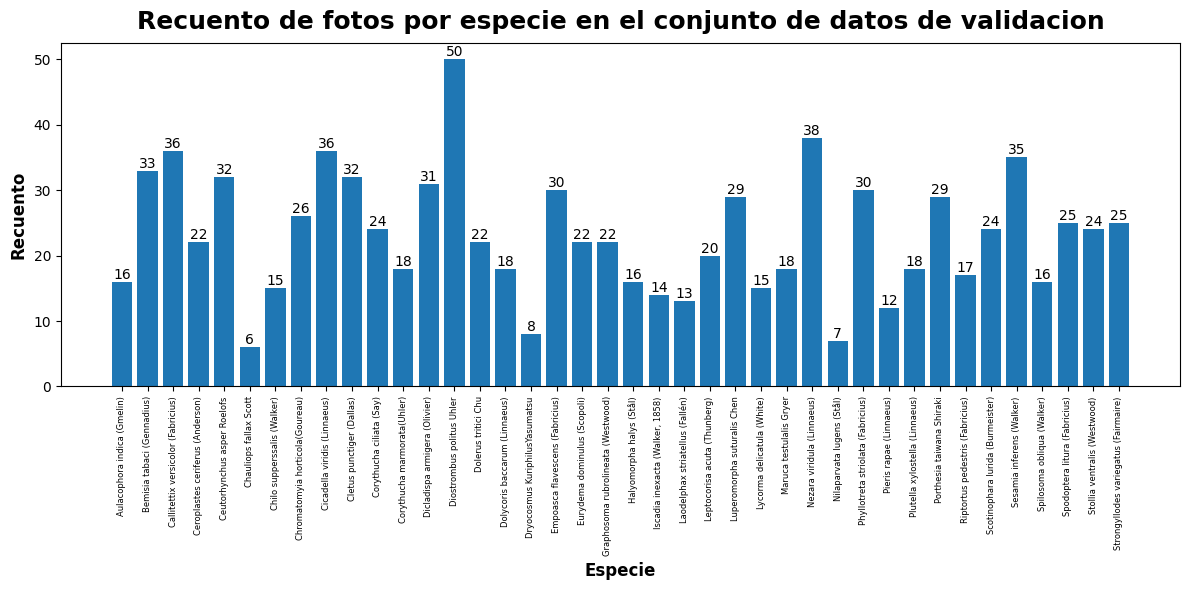

In [20]:
species_count = {species: 0 for species in class_names}

for _, labels in val_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de validacion')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

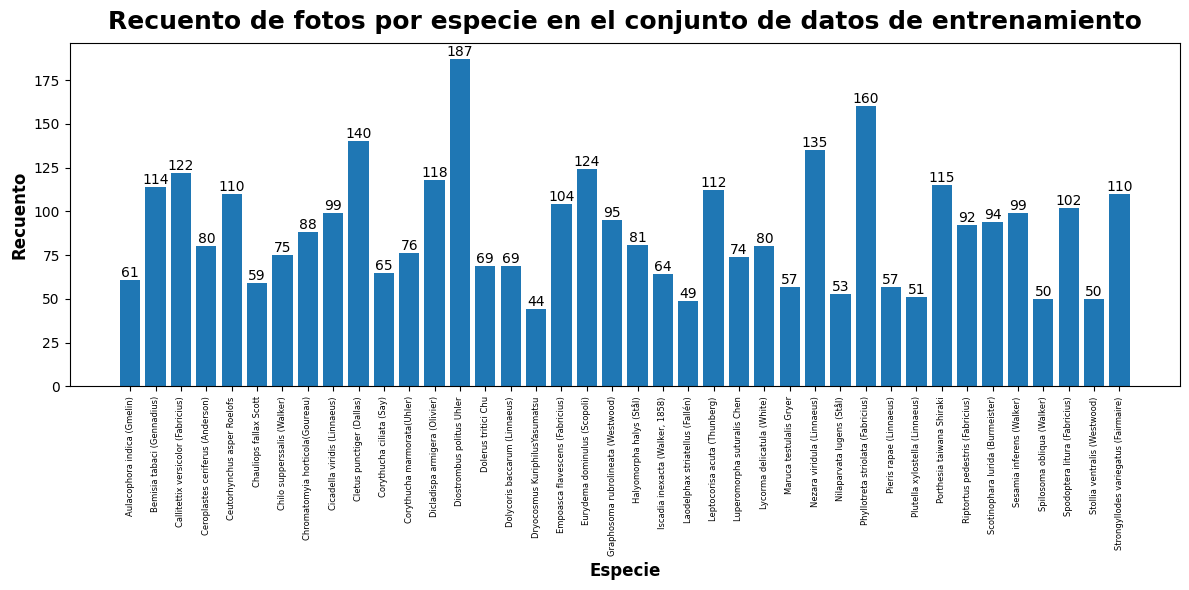

In [21]:
species_count = {species: 0 for species in class_names}

for _, labels in train_dataset:
    for label in labels:
        species_count[class_names[label]] += 1

# Obtén las especies y los recuentos de fotos
species = list(species_count.keys())
counts = list(species_count.values())

# Crea la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Crea el gráfico de barras
bp = ax.bar(species, counts)

# Rota las etiquetas del eje x
ax.set_xticklabels(species, rotation=90, size=6)

# Establece el título y las etiquetas de los ejes
ax.set_title('Recuento de fotos por especie en el conjunto de datos de entrenamiento')
ax.set_xlabel('Especie')
ax.set_ylabel('Recuento')

# Añade las etiquetas de recuento en la parte superior de las barras
for rect in bp:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(height),
            ha='center', va='bottom')

# Muestra el gráfico
plt.tight_layout()
plt.show()

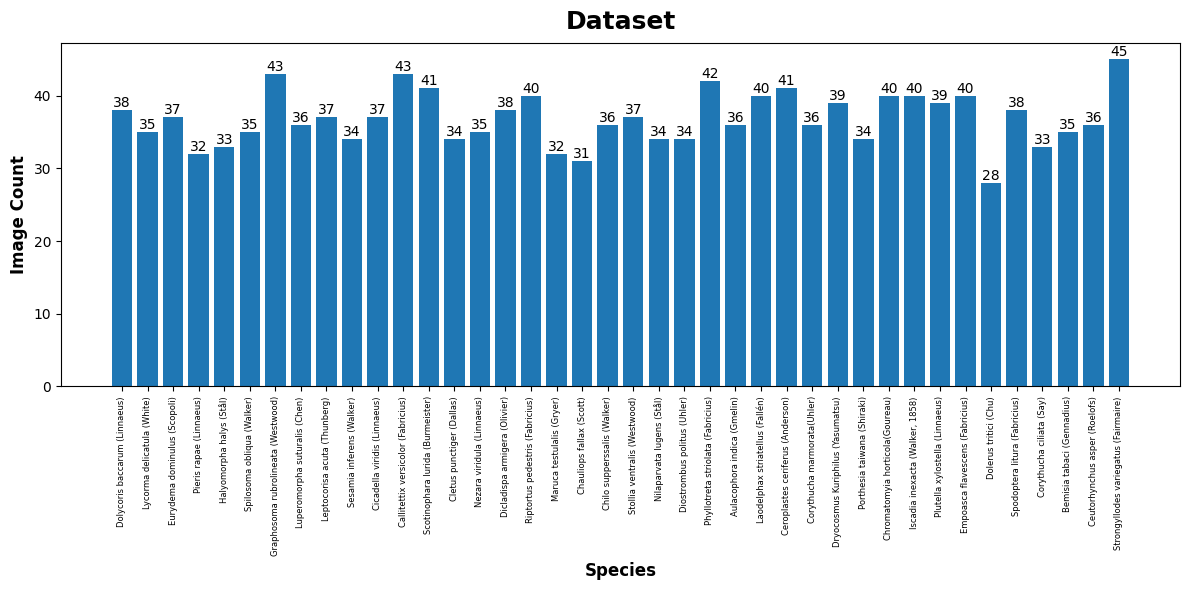

In [22]:
image_count = [len(files) for files in species_folders.values()]

fig, axis = plt.subplots(figsize=(12, 6))
bp = plt.bar(CLASSES, image_count)
plt.xticks(rotation=90, size=6)
plt.title('Dataset')
plt.xlabel('Species')
plt.ylabel('Image Count')

for i, count in enumerate(image_count):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [23]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [24]:
IMG_SHAPE = IMG_SIZE + (3,)
pretrained_base = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
pretrained_base.trainable = False


In [25]:
initial_epochs = 100
model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(species_folders), activation='softmax')
])

Learning rate schedule: 1e-05 to 5e-05 to 1e-05


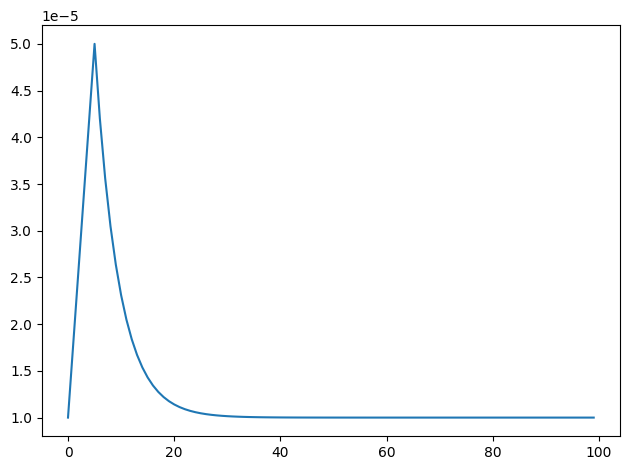

In [26]:
def exponential_lr(epoch,
                   start_lr = 0.00001, min_lr = 0.00001, max_lr = 0.00005,
                   rampup_epochs = 5, sustain_epochs = 0,
                   exp_decay = 0.8):

    def lr(epoch, start_lr, min_lr, max_lr, rampup_epochs, sustain_epochs, exp_decay):
        # linear increase from start to rampup_epochs
        if epoch < rampup_epochs:
            lr = ((max_lr - start_lr) /
                  rampup_epochs * epoch + start_lr)
        # constant max_lr during sustain_epochs
        elif epoch < rampup_epochs + sustain_epochs:
            lr = max_lr
        # exponential decay towards min_lr
        else:
            lr = ((max_lr - min_lr) *
                  exp_decay**(epoch - rampup_epochs - sustain_epochs) +
                  min_lr)
        return lr
    return lr(epoch,
              start_lr,
              min_lr,
              max_lr,
              rampup_epochs,
              sustain_epochs,
              exp_decay)

lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_lr, verbose=True)

rng = [i for i in range(initial_epochs)]
y = [exponential_lr(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience = 10,
    min_delta = 0.001,
    restore_best_weights = True,
)

In [27]:
base_learning_rate = 0.0001
model.compile(optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'],
)

In [28]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    callbacks=[lr_callback],)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100


112/112 [==============================] - 26s 211ms/step - loss: 4.0406 - sparse_categorical_accuracy: 0.0315 - val_loss: 3.5767 - val_sparse_categorical_accuracy: 0.0785 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0008100000379979611.
Epoch 2/100
112/112 [==============================] - 22s 197ms/step - loss: 3.4246 - sparse_categorical_accuracy: 0.1049 - val_loss: 3.4283 - val_sparse_categorical_accuracy: 0.1178 - lr: 8.1000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005060000335611404.
Epoch 3/100
112/112 [==============================] - 22s 197ms/step - loss: 3.2275 - sparse_categorical_accuracy: 0.1303 - val_loss: 3.2955 - val_sparse_categorical_accuracy: 0.1283 - lr: 5.0600e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00023240000449121004.
Epoch 4/100
112/112 [==============================] - 22s 198ms/step - loss: 3.0435 - sparse_categorical_accuracy: 0.1565 - val_loss: 3.2274 - val_sparse_categorical_accur

In [ ]:
model.save('species_recognition_model.h5')

<Axes: >

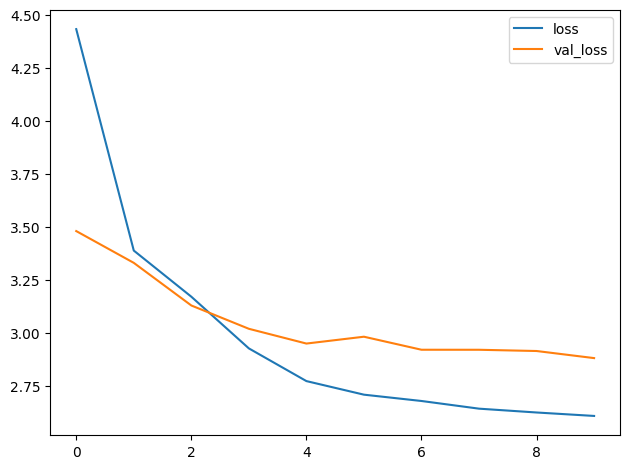

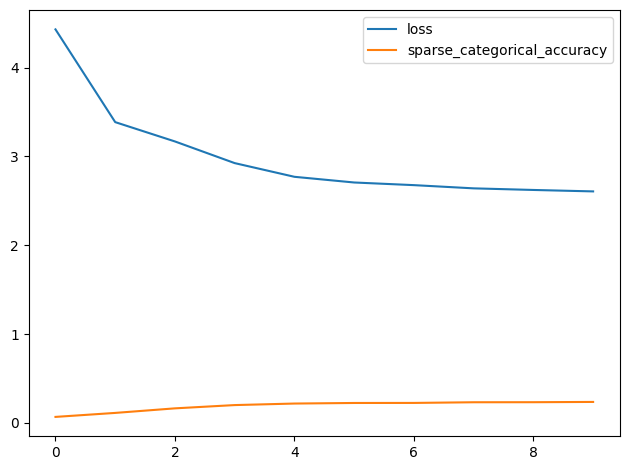

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss', 'val_loss']].plot()
history_frame.loc[:,['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [ ]:

batch = iter(val_dataset.unbatch().batch(20))

1/1 [==============================] - 0s 92ms/step


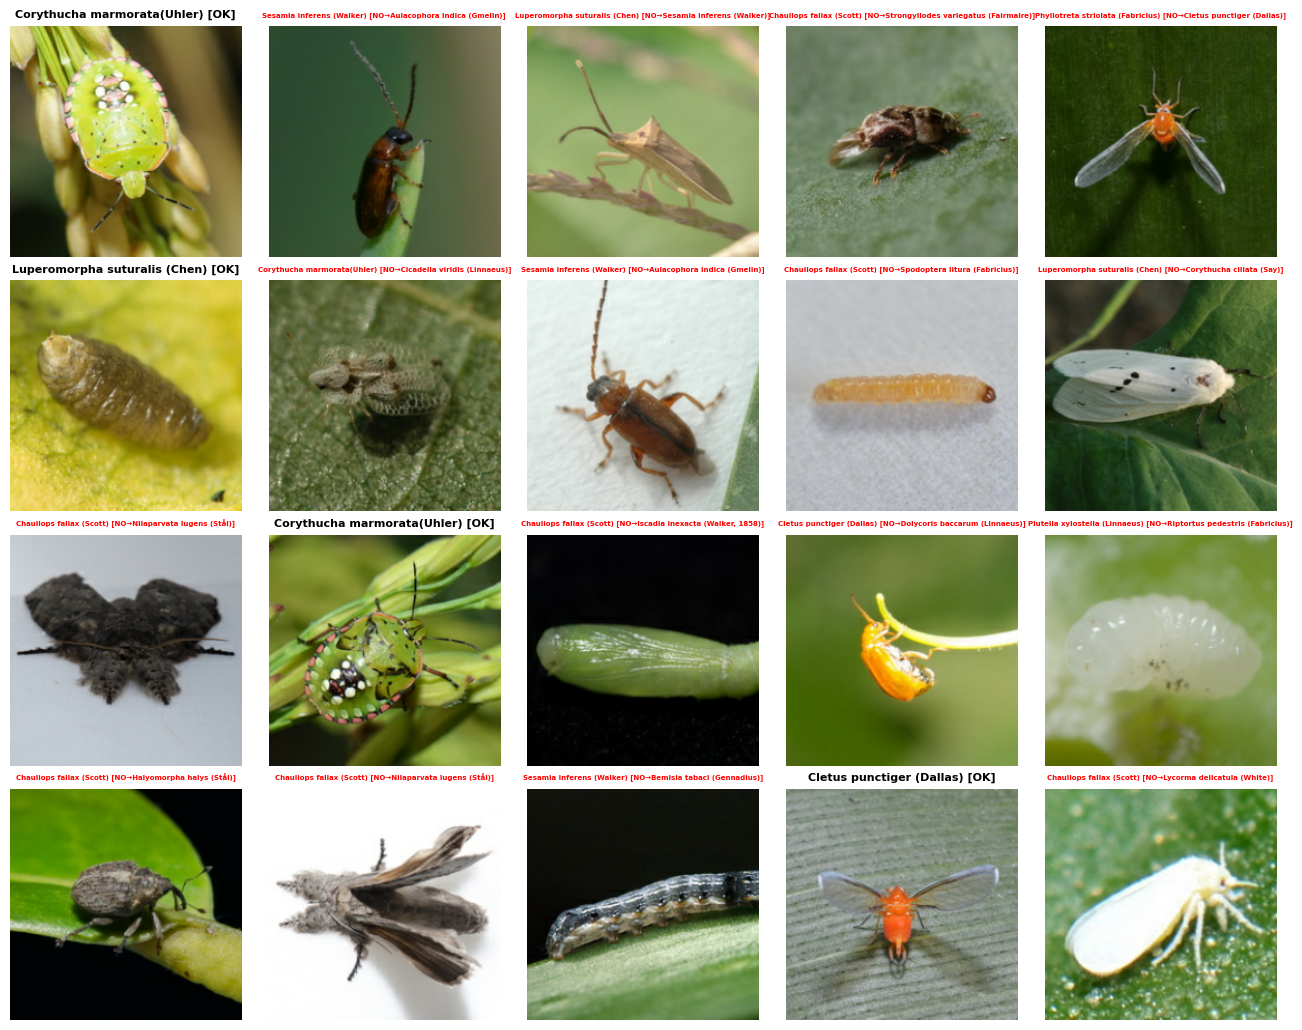

In [ ]:
images, labels = next(batch)
probabilities = model.predict(images)
predictions = np.argmax(probabilities, axis=-1)
display_batch_of_images((images, labels), predictions)